In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer
from sklearn.pipeline import make_pipeline

In [2]:
#1
if __name__ == '__main__':

    # Load Data
    df = pd.read_csv('United_States_COVID-19_Cases_and_Deaths_by_State_over_Time_-_ARCHIVED.csv')
    #df.info()
    
    df_new = df.sort_values(['submission_date'],ascending = False, inplace = True)
    df_new = df["submission_date"].max()
    #df.submission_date.head()
    df_new = df.drop_duplicates(subset=['state']) #instance with dropped duplicates states
    
    #df_new.info()
    #df_new.state.head(60)
    

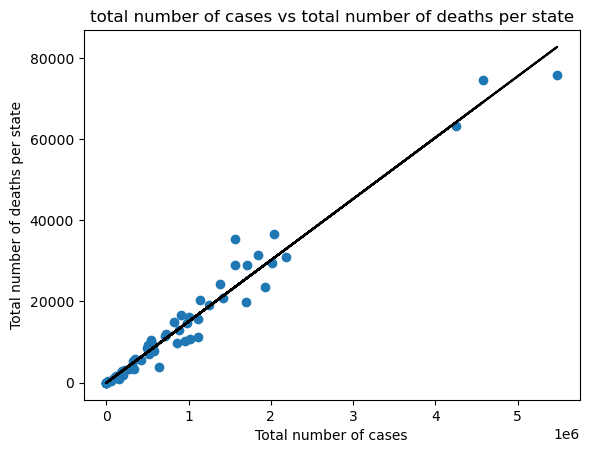

In [4]:
#2,A
    #linear regression
m,b = np.polyfit(df_new.tot_cases,df_new.tot_death,deg=1)
z = [float(entry)*m+b for entry in df_new.tot_cases]
    
plt.figure(1)
    
#plotting
plt.plot(df_new.tot_cases,z,color='black')
    
#plot total number of cases vs total number of deaths per state
plt.scatter(df_new.tot_cases, df_new.tot_death)
    
#labels
plt.xlabel('Total number of cases')
plt.ylabel('Total number of deaths per state')
plt.title('total number of cases vs total number of deaths per state')
plt.show()

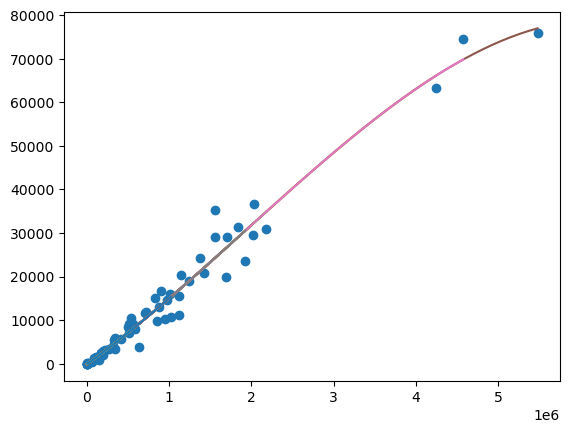

In [9]:
#polynimal regression
#2b
x = df_new.tot_cases
y = df_new.tot_death
coefficients = np.polyfit(x, y, 3)
poly = np.poly1d(coefficients)
    
new_x = np.linspace(x,y)
new_y = poly(new_x)
    
#plt.figure(2)
plt.plot(x, y, "o", new_x, new_y);

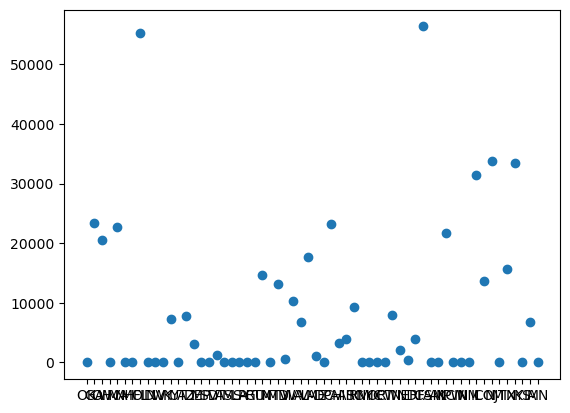

In [10]:
    #3
    
    #df_new.info()
    #df_new.state
    #df_new.new_case
    df_new.submission_date.max() #descending order
    
    
    #df_new.submission_date  
    
    #change figure size
    #rotate figure size
    
    
    plt.scatter(df_new.state,df_new.new_case)